# Models & Evaluation

In [1]:
%run "../../Libraries/Display.ipynb"
%run "../../Libraries/Standard.ipynb"
%run "../../Libraries/Modelling.ipynb"
%run "../../Libraries/Style.ipynb"
%run "../../Core/Standard.ipynb"
%run "../../Core/Engineering.ipynb"
%run "../../Core/Modelling.ipynb"

### Initial Values

In [2]:
apply_log_transform = False # Notice: No transformation has been done for the feature that we want to predict!

apply_RFR = [True, True, True]

apply_RFC = [True, True, True]

apply_DTree = [True, True, True]

apply_SVR = [True, True, True]

apply_GBoost = [True, True, True]

apply_KRR = [True, True, True]

apply_stack_models = [True, True, True]

In [3]:
%store -r predict

%store -r final

%store -r data

df = final

In [4]:
print(predict)

Profitability


In [5]:
if apply_log_transform: df[predict] = np.log(df[predict])

In [6]:
print("Dimensions: " + str(df.shape))

df.head()

Dimensions: (2175, 6)


,Turnover size,GP% 1,Number of Employees (Period 1),working Capital/total sales,Total Sales per Employee (Period 1),Profitability
0,3.888889e-01,0.416667,0.841270,0.070397,0.394949,1
1,3.888889e-01,0.311111,0.980392,0.242742,0.346296,1
2,3.888889e-01,0.600000,0.478632,0.972149,0.640538,1
3,1.000000e-07,0.444444,0.452991,0.188922,0.262527,0
4,3.888889e-01,0.577778,0.686869,0.861824,0.500346,1


In [7]:
y = df[predict]

X = df.drop(predict, axis=1)

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)

### Random Forest

In [8]:
rf_estimators = 20

Best Model: RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='log2', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=10,
           min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
 Best Score: 0.20679667273885655
 RMSE Score: 0.4360125609492772
 Cross Validation Score: 0.20288362529560028


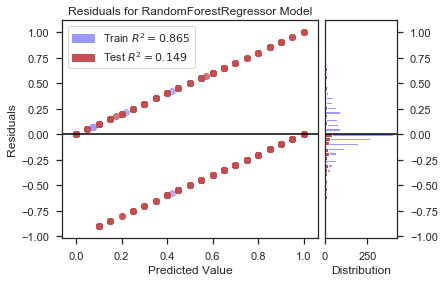

In [9]:
# Regressor
if apply_RFR[0]:
    try:    
        RFR = joblib.load('Saved_Models/funding_companies_RFR_model.pkl')
    except:
        print("No such file!")
        
if apply_RFR[1]:
    parameters_rfg = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["mse" , "mae"], "min_samples_split" : [2, 3, 5, 10], "max_features" : ["auto", "log2"]}

    RFR = model_results(RandomForestRegressor(), parameters_rfg, X_train, y_train, X_valid, y_valid)

    RFR[0].fit(X_train, y_train)
    
    if apply_RFR[2]: joblib.dump(RFR[0], 'Saved_Models/funding_companies_RFR_model.pkl')

    plot_residuals(RandomForestRegressor(n_estimators=rf_estimators, criterion='mse'), X_train, y_train, X_valid, y_valid)

In [10]:
# Classifier
if apply_RFC[0]:
    try:
        RFC = joblib.load('Saved_Models/funding_companies_RFC_model.pkl')
    except:
        print("No such file!")
        
if apply_RFC[1]:
    parameters_rfc = {"n_estimators" : [5, 10, 15, 20], "criterion" : ["gini", "entropy"], "min_samples_split" : [2, 3, 5, 10], "max_features" : ["auto", "log2"]}

    RFC = model_results(RandomForestClassifier(), parameters_rfc, X_train, y_train, X_valid, y_valid)

    RFC[0].fit(X_train, y_train)

    if apply_RFC[2]: joblib.dump(RFC[0], 'Saved_Models/funding_companies_RFC_model.pkl')

    metrics_confusion(RFC[0], X, y)

    print("Report")

    classic_report(RFC[0], X_train, y_train, X_valid, y_valid)

Best Model: RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
 Best Score: -0.1366837253827561
 RMSE Score: 0.5381962211069427
 Cross Validation Score: -0.18616033647283653


c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



Model: <class 'sklearn.model_selection._search.GridSearchCV'>
[[ 664  152]
 [  78 1281]]


Report
              precision    recall  f1-score   support

           0       0.69      0.59      0.63       179
           1       0.74      0.82      0.78       256

   micro avg       0.72      0.72      0.72       435
   macro avg       0.71      0.70      0.70       435
weighted avg       0.72      0.72      0.72       435





### Decision Tree

In [11]:
if apply_DTree[0]:
    try:    
        RFR = joblib.load('Saved_Models/funding_companies_Tree_model.pkl')
    except:
        print("No such file!")
        
if apply_DTree[1]:
    #parameters_dtree = {"criterion" : ["mse", "friedman_mse", "mae"], "splitter" : ["best", "random"], "min_samples_split" : [2, 3, 5, 10], "max_features" : ["auto", "log2"]}

    DTree = model_results(DecisionTreeClassifier(), {}, X_train, y_train, X_valid, y_valid)

    DTree[0].fit(X_train, y_train)
    
    if apply_DTree[2]: joblib.dump(DTree[0], 'Saved_Models/funding_companies_Dtree_model.pkl')

    metrics_confusion(DTree[0], X, y)

    print("Report")

    classic_report(DTree[0], X_train, y_train, X_valid, y_valid)

No such file!
Best Model: DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
 Best Score: -0.5056533571256963
 RMSE Score: 0.5969269964413234
 Cross Validation Score: -0.4958232664482666
Model: <class 'sklearn.model_selection._search.GridSearchCV'>
[[ 816    0]
 [   1 1358]]


Report
              precision    recall  f1-score   support

           0       0.57      0.55      0.56       179
           1       0.69      0.71      0.70       256

   micro avg       0.64      0.64      0.64       435
   macro avg       0.63      0.63      0.63       435
weighted avg       0.64      0.64      0.64       435





### Kernel Ridge

Best Model: KernelRidge(alpha=0.6, coef0=2.5, degree=3, gamma=None, kernel='polynomial',
      kernel_params=None)
 Best Score: 0.2369507229579035
 RMSE Score: 0.43066334648555626
 Cross Validation Score: 0.24325980765387065


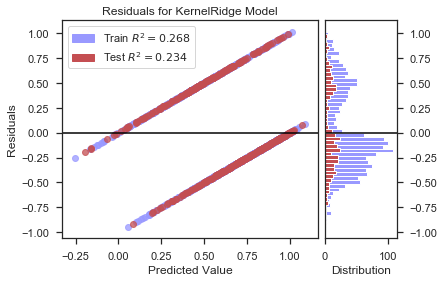

In [12]:
if apply_KRR[0]:
    try:
        KRR_ = joblib.load('Saved_Models/funding_companies_KRR_model.pkl')
    except:
        print("No such file!")
        
if apply_KRR[1]:
    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5)

    KRR_ = model_results(KRR, {}, X_train, y_train, X_valid, y_valid)

    KRR_[0].fit(X_train, y_train)

    if apply_KRR[2]: joblib.dump(KRR_[0], 'Saved_Models/funding_companies_KRR_model.pkl')

    plot_residuals(KRR, X_train, y_train, X_valid, y_valid)

### SVR

In [13]:
if apply_SVR[0]:
    try:
        SVR_ = joblib.load('Saved_Models/funding_companies_svr_model.pkl')
    except:
        print("No such file!")

if apply_SVR[1]:
    SVR_ = SVR(C=1.2, kernel='poly')

    svr = model_results(SVR_, {}, X_train, y_train, X_valid, y_valid)

    svr[0].fit(X_train, y_train)

    if apply_SVR[2]: joblib.dump(svr[0], 'Saved_Models/funding_companies_svr_model.pkl')

Best Model: SVR(C=1.2, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='poly', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)
 Best Score: -0.019326199113953835
 RMSE Score: 0.5102606422086091
 Cross Validation Score: -0.012057248562654166


### GBoost

Best Model: GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.05, loss='huber', max_depth=7,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=10, min_samples_split=5,
             min_weight_fraction_leaf=0.0, n_estimators=20,
             n_iter_no_change=None, presort='auto', random_state=3,
             subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)
 Best Score: 0.12893452961491958
 RMSE Score: 0.46358133061932133
 Cross Validation Score: 0.13042027833935763


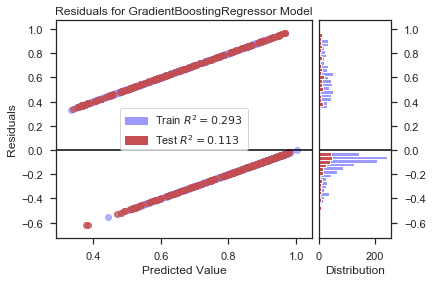

In [14]:
if apply_GBoost[0]:
    try:
        GBoost = joblib.load('Saved_Models/funding_companies_GBoost_model.pkl')
    except:
        print("No such file!")

if apply_GBoost[1]:
    GBoost = GradientBoostingRegressor(n_estimators=20, learning_rate=0.05, max_depth=7, max_features='sqrt', min_samples_leaf=10, min_samples_split=5, loss='huber', random_state =3)

    GBoost_ = model_results(GBoost, {}, X_train, y_train, X_valid, y_valid)

    GBoost_[0].fit(X_train, y_train)

    if apply_GBoost[2]: joblib.dump(GBoost_[0], 'Saved_Models/funding_companies_GBoost_model.pkl')

    plot_residuals(GBoost, X_train, y_train, X_valid, y_valid)

### Stack Model

In [15]:
if apply_stack_models[0]:
    try:
        grid_stacked = joblib.load('Saved_Models/funding_companies_stacking_regressor_model.pkl')
    except:
        print("No such file!")

if apply_stack_models[1]:
    random_forest = RandomForestRegressor()

    KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=3, coef0=2.5)

    SVR_ = SVR(C=1.2, kernel='poly')

    GBoost = GradientBoostingRegressor(n_estimators=20, learning_rate=0.05, max_depth=7, max_features='sqrt', min_samples_leaf=10, min_samples_split=5, loss='huber', random_state =3)
    ##################################################################################################################################################################################
    # GridSearchCV
    ensemble_model = StackingRegressor(regressors=[random_forest, KRR, GBoost], meta_regressor=SVR_)

    params = {'meta_regressor__C': [0.1, 1.0, 10.0, 100.0], 'meta_regressor__gamma': [0.1, 1.0, 10.0]}

    grid_stacked = model_results(ensemble_model, params, X_train, y_train, X_valid, y_valid)

    grid_stacked[0].fit(X_train, y_train)
    ##################################################################################################################################################################################
    # Save the model as a pickle in a file
    if apply_stack_models[2]: joblib.dump(grid_stacked[0], 'Saved_Models/funding_companies_stacking_regressor_model.pkl')

c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:251: UserWarning:

Trying to unpickle estimator DecisionTreeRegressor from version 0.21.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.

c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:251: UserWarning:

Trying to unpickle estimator RandomForestRegressor from version 0.21.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.

c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:251: UserWarning:

Trying to unpickle estimator KernelRidge from version 0.21.0 when using version 0.20.2. This might lead to breaking code or invalid results. Use at your own risk.

c:\users\manos\appdata\local\programs\python\python36\lib\site-packages\sklearn\base.py:251: UserWarning:

Trying to unpickle estimator GradientBoostingRegressor from 

No such file!
Best Model: StackingRegressor(meta_regressor=SVR(C=0.1, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
         refit=True,
         regressors=[RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estima...      subsample=1.0, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)],
         store_train_meta_features=False, use_features_in_secondary=False,
         verbose=0)
 Best Score: 0.06686928874081215
 RMSE Score: 0.4595978168975465
 Cross Validation Score: 0.12731511668243933


KeyboardInterrupt: 

# Predictions

In [ ]:
# This is a simple naive prediction.
x = data.drop([predict], axis=1)

y = data[predict]

In [ ]:
x.loc[-1] = [1, 2, 0.12, 0.22, 0, 77.0, -0.076097, 120791.0, 0]  # Adding a row for prediction.
    
x.index = x.index + 1  # Shifting index

x = x.sort_index()  # Sorting by index

In [ ]:
x = QuantileTransformer(n_quantiles=10, random_state=42).fit_transform(x.values)

In [ ]:
single_prediction = [x[0]]

In [ ]:
model = LogisticRegression()

model.fit(X_train, y_train)

print("Single prediciton result: " + str(model.predict(single_prediction)[0]))

# Others

Things that I tried and failed to give a good result:
* Probabilities based on various feature, for instance, location, employee size etc.
* Z-score outliers.
* Take only one sector and predict location or date.
* Combination of different features, based on PCA (or not).
* Take features without PCA and apply normalisation.
* Take only categorical features.